<a href="https://colab.research.google.com/github/cornelius152/Text-Classification---Data-Science-Internship/blob/main/CDC_Data_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Data**

In [3]:
# Importing data: excel sheet with only relevant columns, as original datafile contained unnecessary columns
cdc_data = pd.read_csv('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/Behavioral_Risk_Factor_Surveillance_System__BRFSS__Historical_Questions.csv')

In [4]:
cdc_data.head(3)

,Topic,Question,VariableName,Responses,Year,Type,DisplayOrder
0,Health Status/Healthy Days,Would you say that in general your health is---,GENHLTH,1=Excellent 2=Very good 3=Good 4=Fair 5=Po...,2013,Core Question,1
1,Health Status/Healthy Days,"Now thinking about your physical health, which...",PHYSHLTH,__ __=Number of days 88=None 77=DK/NS 99=Re...,2013,Core Question,2
2,Health Status/Healthy Days,"Now thinking about your mental health, which i...",MENTHLTH,__ __=Number of days 88=None 77=DK/NS 99=Re...,2013,Core Question,3


# **Exploratory Analysis**

##### Things we need to know:
1. Total number of distinct or unique topics, questions and variables
2. Total number of distinct questions and variables per topic
3. Visual representation of distribution
4. Wordcloud of all the words in the dataset, minus stopwords and punctuation
5. Can we make any assumptions on whether we need more classified data?
6. How about train/test split strategy?

## Total number of distinct or unique topics, questions and variables

In [5]:
# Total number of distinct or unique questions in 'Question' and 'Variable' columns

# Building a function that counts the unique number of samples in a column or feature by creating a list of unique samples
def feature_counter(data, column):
    count = 0
    unique = []

    for i in range(len(data)):
        if data[column][i] not in unique:
            unique.append(data[column][i])
            count += 1
        else:
            pass
        
    print(f'{column}: {count}')

feature_counter(cdc_data, 'Topic')
feature_counter(cdc_data, 'Question')
feature_counter(cdc_data, 'VariableName')

Topic: 159
Question: 1648
VariableName: 1388


## Total number of distinct questions and variables per topic

In [6]:
# Total number of distinct questions and variables in each topic
# First creating an empty dictionary where I will store all the topics; all key values will be lists, which will hold every distinct...
# question and variable; we will then count the number of unique items in each list to get the counts
import operator

def topic_dist_counter(data, column):
    dic = {}

    for i in range(len(data)):
        if data['Topic'][i] not in dic:
            dic[data['Topic'][i]] = []
        if data[column][i] not in dic[data['Topic'][i]]:
            dic[data['Topic'][i]].append(data[column][i])
            
    sorted_dic = dict(sorted(dic.items(), key=lambda item: len(item[1]), reverse=True)[:25])
    counts = []
    
    for i in sorted_dic:
        counts.append(len(sorted_dic[i]))
        print(f'{i}: {len(sorted_dic[i])}')
        
    color = '#86C6E5'

    plt.bar(sorted_dic.keys(), counts, color=color)
    plt.xticks(rotation=90)
    plt.title(f"Top 25 Topic Counts for CDC Data {column}s")
    plt.xlabel("Topic")
    plt.ylabel(f'{column} Count')
    plt.show()
        
    print()

HIV/AIDS: 95
Demographics: 82
Tobacco Use/Smoking Cessation/Secondhand Smoke: 77
Health Care Coverage/Access: 59
Women's Health: 58
Injury/Residential Fire/Firearms/Seatbelt Use: 47
Cardiovascular Disease/Heart Attack and Stroke: 45
Colorectal Cancer Screening: 45
Diabetes: 36
Alcohol Consumption: 35
Visual Impairment and Access to Eye Care: 33
Prostate Cancer Screening: 32
Chronic Health Conditions: 31
Cancer Survivorship: 29
Quality Of Life/Healthy Days (Symptoms)/Disability: 27
Family Planning: 27
Nutrition/Diet/Fruits and Vegetables: 27
Weight Control: 27
Arthritis (Arthritis Management/Burden): 26
Sexual Behavior: 25
Asthma/Adult Asthma History: 23
Health Care Access: 21
Exercise/Physical Activity: 21
Anxiety and Depression: 21
Social Context: 20


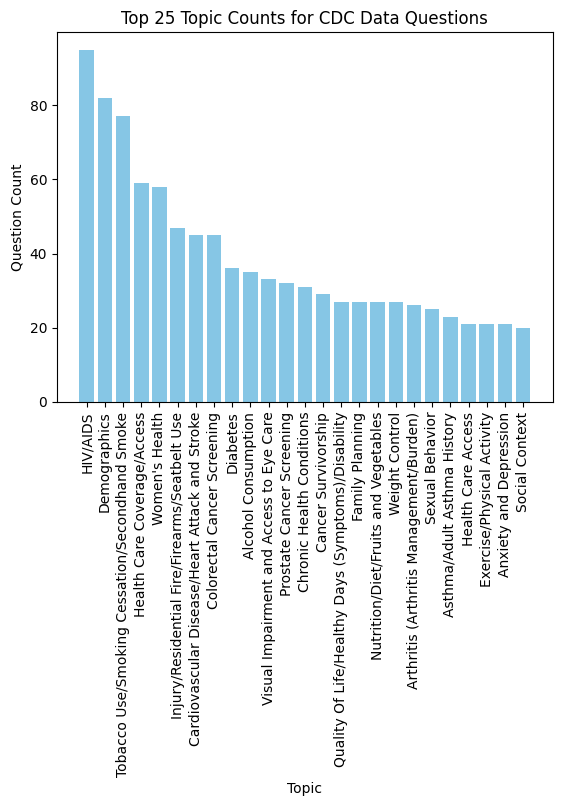

In [7]:
topic_dist_counter(cdc_data, 'Question')

HIV/AIDS: 84
Demographics: 72
Tobacco Use/Smoking Cessation/Secondhand Smoke: 66
Health Care Coverage/Access: 49
Cardiovascular Disease/Heart Attack and Stroke: 46
Colorectal Cancer Screening: 45
Injury/Residential Fire/Firearms/Seatbelt Use: 42
Women's Health: 32
Visual Impairment and Access to Eye Care: 32
Diabetes: 28
Quality Of Life/Healthy Days (Symptoms)/Disability: 27
Family Planning: 26
Alcohol Consumption: 25
Chronic Health Conditions: 24
Nutrition/Diet/Fruits and Vegetables: 23
Health Care Access: 21
Arthritis (Arthritis Management/Burden): 21
Prostate Cancer Screening: 21
Sexual Behavior: 21
Asthma/Adult Asthma History: 19
Exercise/Physical Activity: 19
Cancer Survivorship: 19
Care Giving/Caregiver Status/Caregiver: 19
Caregiver: 19
Weight Control: 19


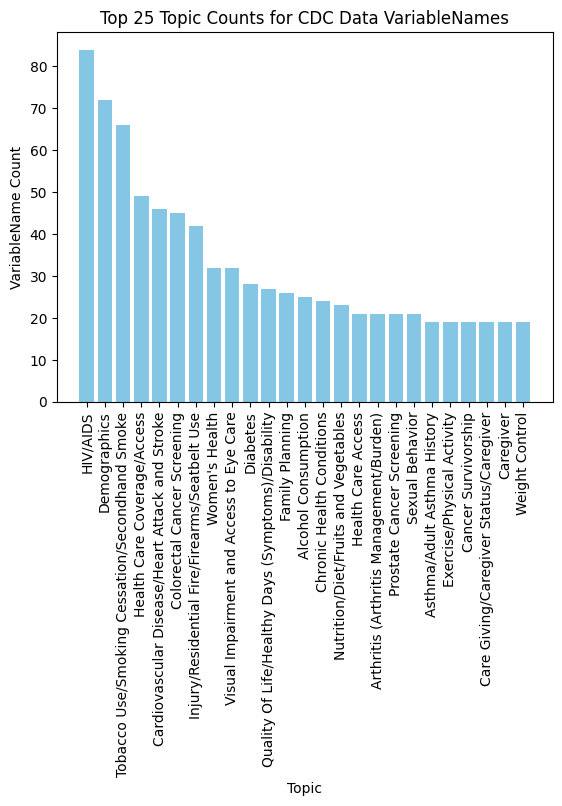

In [8]:
topic_dist_counter(cdc_data, 'VariableName')

In [9]:
# Getting all the unique questions
unique_cdc_data = cdc_data.drop_duplicates(subset='Question', keep='first', ignore_index=True)

In [10]:
print(len(unique_cdc_data))

1648


In [11]:
# Downloading dataset as csv
# unique_cdc_data.to_csv('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/unique_cdc_questions.csv', index=False)

# **WordCloud**

In [12]:
# Wordcloud
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# Importing wordcloud as well as stopwords
from wordcloud import WordCloud, STOPWORDS

# Importing string library which will allow us to manipulate strings
import string

In [14]:
# Wordcloud function

def wc(data, feature='Question'):
    # Creating a list of separate words from EVERY question to use in wordcloud
    words = []

    # Running a for loop to split each question into distinct words and add those words into my words list
    for i in data[feature]:
        for j in i.split():
            words.append(j)

    # Simple preprocessing:
    # Removing stopwords from words list
    stopwords = sorted(STOPWORDS)

    for i in words:
        if i in stopwords:
            words.remove(i)

    # Removing punctuation, by converting list of words to a string of words and searching through it for punctuation
    string_words = str(words).translate(str.maketrans('', '', string.punctuation))

    return string_words

In [15]:
# Function to generate wordcloud image

def wordcloud_img(string_words, name):
    # Generating and plotting wordcloud for words in 'questions' column
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    collocations = False,
                    min_font_size = 10).generate(string_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.title(f'WordCloud of Words in {name} Questions')
    plt.imshow(wordcloud)

In [16]:
cdc_string_words = wc(cdc_data)

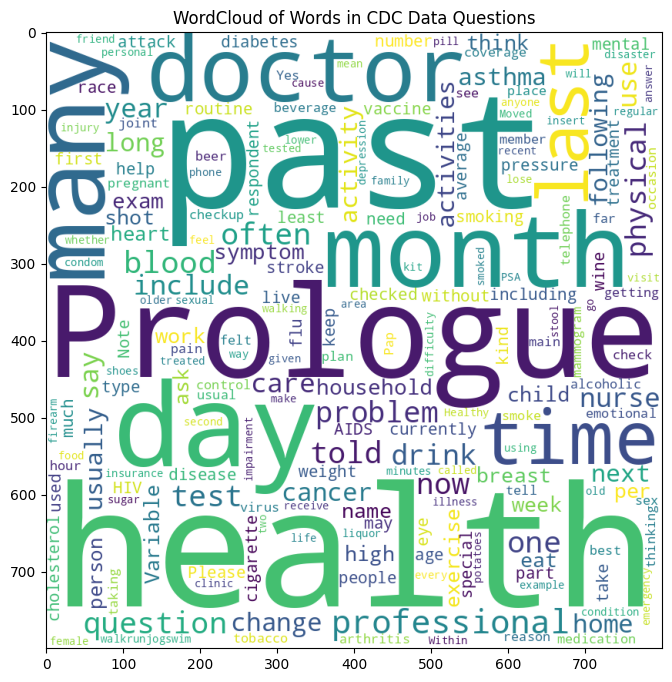

In [17]:
wordcloud_img(cdc_string_words, 'CDC Data')

# **CDC Data + Classified OneHealth Data**

In [18]:
# Classified (c) data
c_data = pd.read_excel('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/categorized_questions.xlsx')

In [19]:
# All classified data (c_data + cdc_data)
class_data = pd.concat([c_data, cdc_data])

In [20]:
class_string_words = wc(class_data)

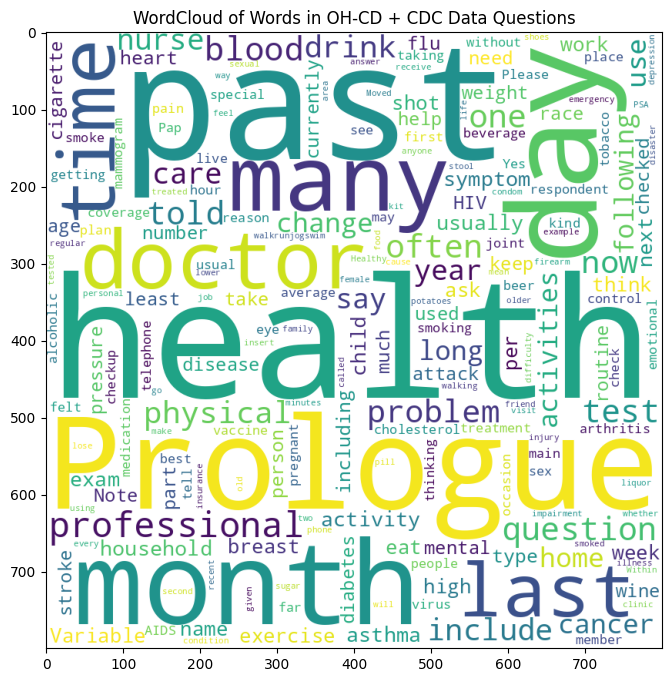

In [21]:
wordcloud_img(cdc_string_words, 'OH-CD + CDC Data')